In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('../input/customer-clustering/segmentation data.csv')
dataset.shape

(2000, 8)

Dropping the rows which have missing values in 'Age' and 'Income' column.

In [3]:
dataset = dataset.dropna(subset = ['Age','Income'])
dataset.shape

(2000, 8)

In [4]:
X = dataset.iloc[:,[3, 5]].values

In [5]:
X[:5,:]

array([[    67, 124670],
       [    22, 150773],
       [    49,  89210],
       [    45, 171565],
       [    53, 149031]])

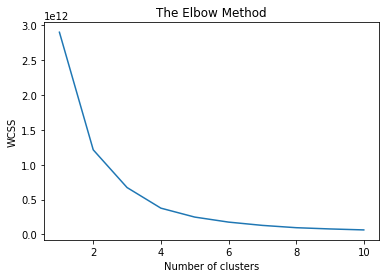

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 3, 2, ..., 2, 0, 2], dtype=int32)

Plotting scatter plot between age and income which is divided into 4 clusters so conclusions can be drawn from it.

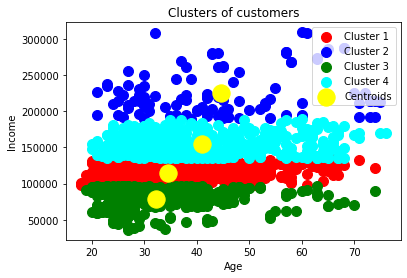

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

The graph has been plot between Age and Income, so different conclusions can be drawn from it, for example:

1. If the company wants to launch a new product targated at people below 50, they can price it at less than 150000 to maximize their sales.

2. If the comapny wants to build a product that is used by people > 60 years, which would cost more than 150000, they can look and the graph and decide if it would be feasible or not as the customer base in this region is very less.

